In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# read csv file :
data=pd.read_csv("Fuel.csv")
data.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
#Let's select some features to explore more :
data = data[["ENGINESIZE","CO2EMISSIONS"]]

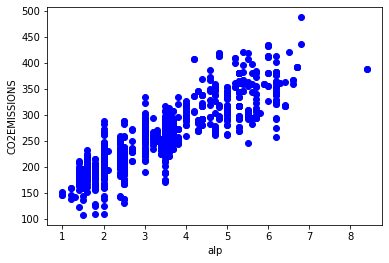

In [6]:
# ENGINESIZE vs CO2EMISSIONS :
plt.scatter(data["ENGINESIZE"],data["CO2EMISSIONS"], color="blue")
plt.xlabel("alp")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [7]:
# Generating trainin and testing data from our data :
# We are using %80 data for training.
train= data[:(int((len(data)*0.8)))]
test=data[(int((len(data)*0.8))):]
print(len(data))
print(len(train))
print(train)

1067
853
     ENGINESIZE  CO2EMISSIONS
0           2.0           196
1           2.4           221
2           1.5           136
3           3.5           255
4           3.5           244
..          ...           ...
848         3.5           251
849         3.5           271
850         2.0           214
851         3.5           244
852         3.5           253

[853 rows x 2 columns]


In [10]:
#Modeling:
#Using sklearn package to model data:

from sklearn import linear_model
regr=linear_model.LinearRegression()

train_x=np.array(train[["ENGINESIZE"]])
train_y=np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x,train_y)

#The coefficients :
print("coefficients : ",regr.coef_) #Slope
print("Intercept : ",regr.intercept_) #Intercept



coefficients :  [[38.79512384]]
Intercept :  [127.16989951]


Text(0, 0.5, 'Emission')

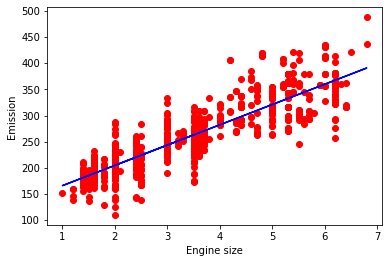

In [13]:
plt.scatter(train["ENGINESIZE"],train["CO2EMISSIONS"], color='red')
plt.plot(train_x,regr.coef_*train_x+regr.intercept_,'-b')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [14]:
#Predicting values:
#Function for predicting future values:

def get_regression_predictions(input_features,intercept,slope) :
    predicted_values=input_features*slope+intercept
    
    return predicted_values

In [16]:
#Predicting emission for future car:

my_engine_size=3.5
estimatd_emission=get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated Emission: ",estimatd_emission)

Estimated Emission:  262.9528329350173


In [18]:
#Checking various accuracy

from sklearn.metrics import r2_score

test_x = np.array(test[['ENGINESIZE']])
test_y= np.array(test[['CO2EMISSIONS']])
test_y_=regr.predict(test_x)
print("Mean absolute error: %.2f"% np.mean(np.absolute(test_y_-test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_-test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_,test_y))

Mean absolute error: 20.60
Mean sum of squares (MSE): 746.45
R2-score: 0.71
